Portuguese Banking Product:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


Reading the data:                                      
We are using delimiter (;) since the data is not comma separated and read the data

In [21]:
bank = pd.read_csv('/Users/shyam/Madhu/notes/sas/sasproj/bank-additional-full.csv', delimiter=";")
bank

df1 = pd.DataFrame(bank)
df1


#  Reading the test dataset(bank_additional)
bank_testdata =  pd.read_csv('/Users/shyam/Madhu/notes/sas/sasproj/bank-additional/bank-additional.csv', delimiter=";")
bank_testdata

df2 = pd.DataFrame(bank_testdata)
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [22]:
##Exploring Data:                                          
#To find null values we are checking with function isnull
bank.isnull().values.any()
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
##Screening the data :                                       
#To find for any anomalies and to see the in-depth details about the attributes in the data set.
df = pd.DataFrame(bank)
df.describe(include='all')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


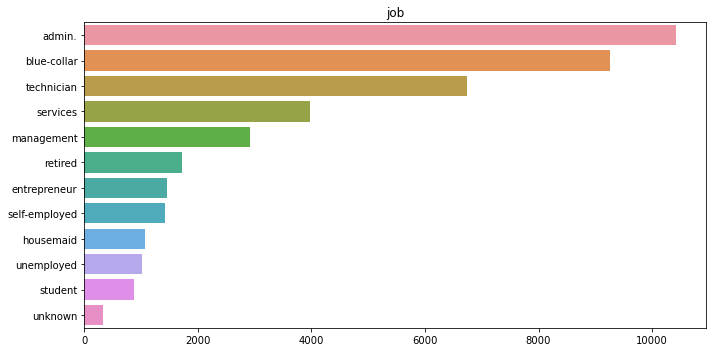

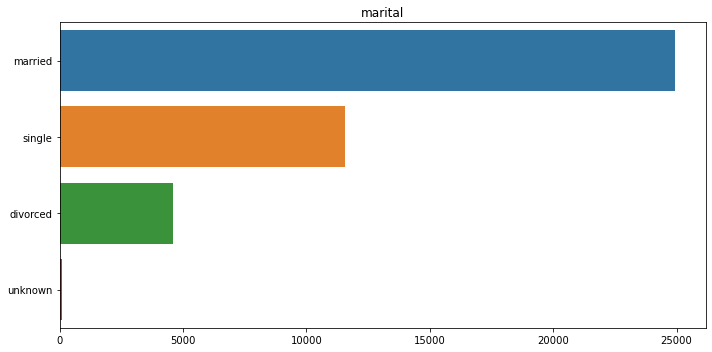

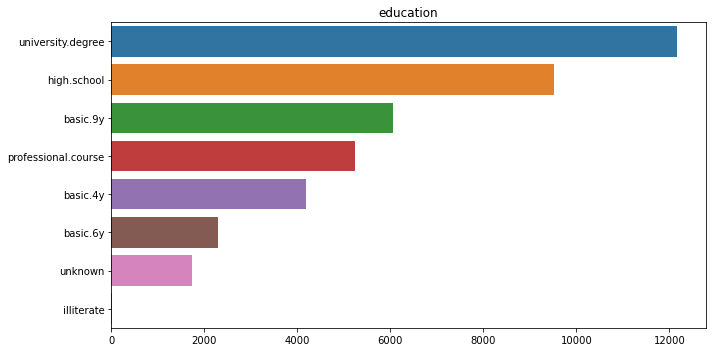

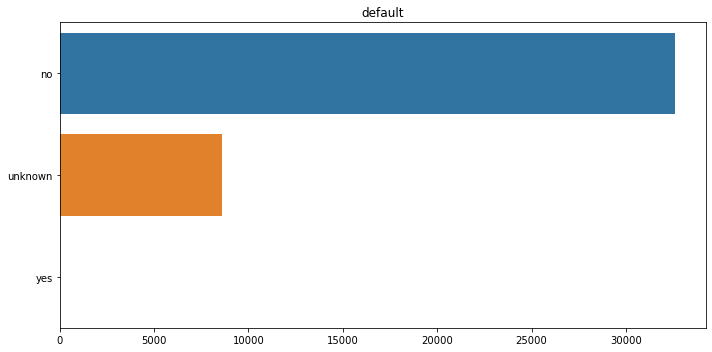

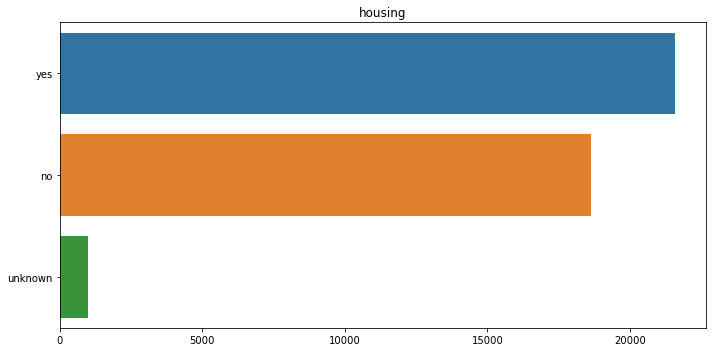

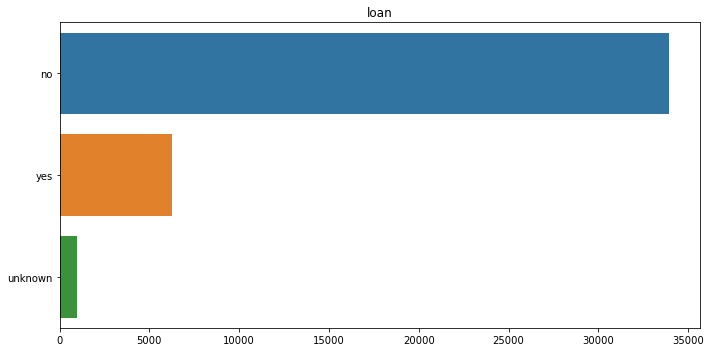

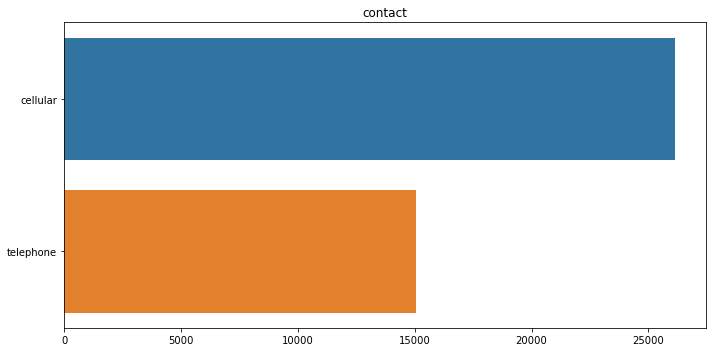

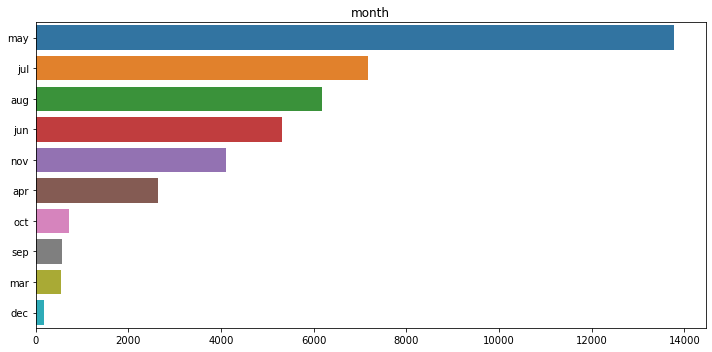

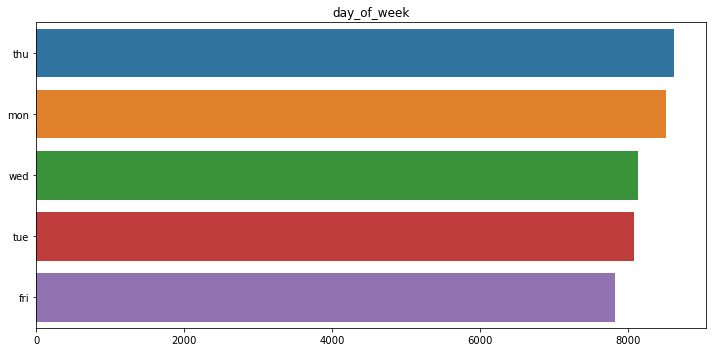

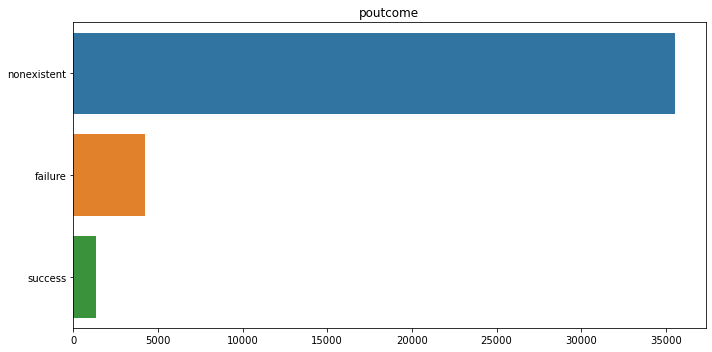

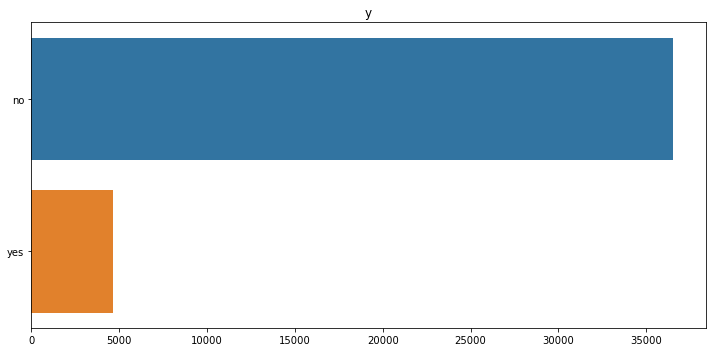

In [24]:
##Visualtization:
category_features = df1.select_dtypes(include=['object', 'bool']).columns.values
category_features
for col in category_features:
    plt.figure(figsize=(10,5))
    sns.barplot(df[col].value_counts().values,df[col].value_counts().index,data=df)
    plt.title(col)
    plt.tight_layout()


Text(0, 0.5, 'Frequency of Purchase')

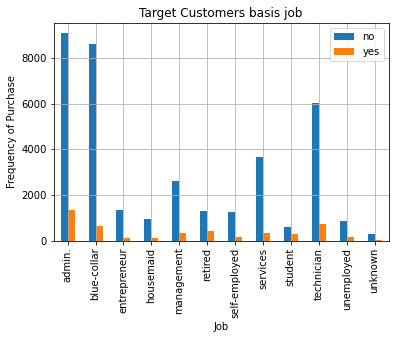

In [9]:
table = pd.crosstab(df1.job, df1.y)
table.columns = ['no', 'yes']
table.plot(kind='bar')
plt.grid(True)
plt.title('Target Customers basis job')
plt.xlabel('Job')
plt.ylabel('Frequency of subscription')

Text(0, 0.5, 'Frequency of subscription')

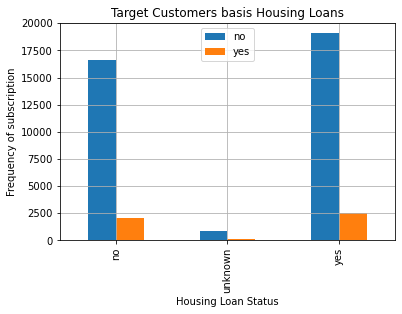

In [26]:
table1 = pd.crosstab(df1.housing, df1.y)
table1.columns = ['no', 'yes']
table1.plot(kind='bar')
plt.grid(True)
plt.title('Target Customers basis Housing Loans')
plt.xlabel('Housing Loan Status')
plt.ylabel('Frequency of subscription')


Text(0, 0.5, 'Frequency of subscription')

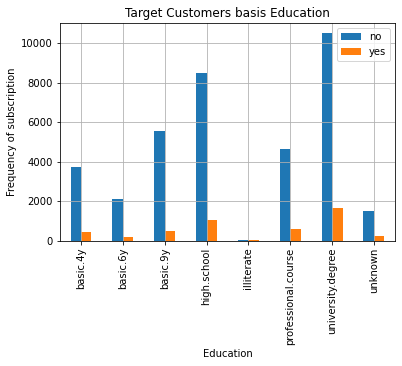

In [16]:
table = pd.crosstab(df1.education, df1.y)
table.columns = ['no', 'yes']
table.plot(kind='bar')
    plt.grid(True)
plt.title('Target Customers basis Education')
plt.xlabel('Education')
plt.ylabel('Frequency of subscription')

Text(0, 0.5, 'Frequency of subscription')

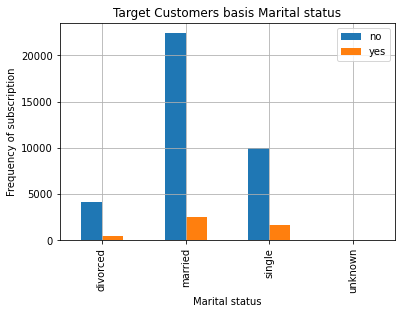

In [17]:
table = pd.crosstab(df1.marital, df1.y)
table.columns = ['no', 'yes']
table.plot(kind='bar')
plt.grid(True)
plt.title('Target Customers basis Marital status')
plt.xlabel('Marital status')
plt.ylabel('Frequency of subscription')

In [299]:
#DataManipulation: Since y is binary converting yes, no to 1, 0.
df1.y = df1.y.map(dict(yes=1, no=0))
df1.y
#Imputation:
#df1.drop(df[df.education == 'illiterate'].index, inplace=True)
#df1.drop(df[df.default == 'yes'].index, inplace=True) 
job_impute = df1['job'].value_counts()
df1["job"].replace(['unknown'],df1['job'].mode(),inplace=True)
mar_impute = df1['marital'].value_counts()
df1["marital"].replace(['unknown'],df1['marital'].mode(),inplace=True)

df1['housing'].value_counts()
df1["housing"].replace(['unknown'],df1['housing'].mode(),inplace=True)

df1['loan'].value_counts()
df1["loan"].replace(['unknown'],df1['loan'].mode(),inplace=True)

df1['education'].value_counts()
df1['default'].value_counts()
#df1["pdays"].replace(999,-1,inplace=True)

df1.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [300]:
# Mapping y variable for test dataset(bank-additional)
df2.y = df2.y.map(dict(yes=1, no=0))
df2.y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [302]:
# Label encoding Training data:
col = ['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
LE = LabelEncoder()
df1[col]=df1[col].apply(LE.fit_transform)
df1

# Label encoding for Test dataset (bank_additional)
col = ['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
LE_testdata = LabelEncoder()
df2[col]=df2[col].apply(LE_testdata.fit_transform)
df2



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [282]:
###MODEL 4: OVERSAMPLING WITH IMPUTATION

random.seed(123)
##Splitting Data:                                 
#X value consist of variables, Excluding variables with VIF score greater than 10 .                    
#Y value consist of responce variable y
X=df1.iloc[: , :-1]
Y=df1['y']

##Scaling of Data:                                  
#Transforming data to fit into specific scale using StandardScaler which makes all the variable to be in scale of 0-1.
col1=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler = StandardScaler()
X[col1]=scaler.fit_transform(X[col1])

print("Before OverSampling, counts of label '1': {}".format(sum(Y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y == 0)))

##Oversampling of data:
ros = RandomOverSampler(random_state=888)
X_resampled, y_resampled = ros.fit_resample(X, Y)

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_resampled == 0)))



##Testing and Traning Data:
#We spilt the data 80-20ratio where 80% dedicated for testing and 20% dedicate for testing of data.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, random_state=123)

##Logistic Regression Model Fitting:
#Creating a Logistic Regression classifier object using LogisticRegression() function.Then we fit the model on the train set using fit().
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=123)
LR_model.fit(X_train, y_train)

##Make prediction on test data:                                
#Performing prediction on the test set using predict().
predictions = LR_model.predict(X_test)
score = LR_model.score(X_test, y_test)

##Accuracy:                     
#Finding the accuracy of data to find the quality of the model.
print("Train accuracy: {} ".format(LR_model.fit(X_train, y_train).score(X_train, y_train)))

##Confusion Matrix:                                
#The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.
#cm = metrics.confusion_matrix(y_test, predictions)

##ROC for the model:                                 
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
#probs = LR_model.predict_proba(X_test)
#preds = probs[:,1]
#print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, preds))
#fpr1, tpr1, threshold = metrics.roc_curve(y_test, preds)
#roc_auc1 = metrics.auc(fpr1, tpr1)



############################
# Bank additional (test dataset)

X_testdata=df2.iloc[: , :-1]
Y_testdata=df2['y']

##Scaling of Data:                                  
# #Transforming data to fit into specific scale using StandardScaler which makes all the variable to be in scale of 0-1.
col1_testdata=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler_testdata = StandardScaler()
X_testdata[col1_testdata]=scaler_testdata.fit_transform(X_testdata[col1_testdata])
#Make prediction on test data:                                
#Performing prediction on the test set using predict().
predictions_testdata = LR_model.predict(X_testdata)
score_testdata = LR_model.score(X_testdata, Y_testdata)

##Accuracy:                     
#Finding the accuracy of data to find the quality of the model.
#print("Score for test dataset (bank-additional):",score_testdata)
print("Test accuracy for test dataset (bank-additional): {} ".format(LR_model.fit(X_train, y_train).score(X_testdata, Y_testdata)))
cm_testdata = metrics.confusion_matrix(Y_testdata, predictions_testdata)
print('\nThe Confusion Matrix for test dataset (bank-additional):\n', cm_testdata)


probs_testdata = LR_model.predict_proba(X_testdata)
preds_testdata = probs_testdata[:,1]
print('\nArea Under the Receiver Operating Characteristic Curve for test dataset (bank-additional):', roc_auc_score(Y_testdata, preds_testdata))
fpr4_testdata, tpr4_testdata, threshold_testdata = metrics.roc_curve(Y_testdata, preds_testdata)
roc_auc4_testdata = metrics.auc(fpr4_testdata, tpr4_testdata)


##Summary:
LM_modell=sm.Logit(y_train,X_train)
result=LM_modell.fit()
print(result.summary2())

Before OverSampling, counts of label '1': 4640
Before OverSampling, counts of label '0': 36548 

After OverSampling, counts of label '1': 36548
After OverSampling, counts of label '0': 36548 

Train accuracy: 0.8618578562145154 
Test accuracy for test dataset (bank-additional): 0.8538480213644088 

The Confusion Matrix for test dataset (bank-additional):
 [[3120  548]
 [  54  397]]

Area Under the Receiver Operating Characteristic Curve for test dataset (bank-additional): 0.93373020574659
Optimization terminated successfully.
         Current function value: 0.341168
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.508     
Dependent Variable: y                AIC:              39940.2350
Date:               2022-04-23 22:05 BIC:              40119.7624
No. Observations:   58476            Log-Likelihood:   -19950.   
Df Model:           19               LL-Null:          -40532.   
Df Residuals:       58456         

In [288]:
###MODEL 3: UNDERSAMPLING, SCALING AND IMPUTATION


random.seed(123)


##Splitting Data:                                 
#X value consist of variables, Excluding variables with VIF score greater than 10 .                    
#Y value consist of responce variable y
X=df1.iloc[: , :-1]
Y=df1['y']

##Scaling of Data:                                  
#Transforming data to fit into specific scale using StandardScaler which makes all the variable to be in scale of 0-1.
col1=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler = StandardScaler()
X[col1]=scaler.fit_transform(X[col1])

print("Before UnderSampling, counts of label '1': {}".format(sum(Y == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(Y == 0)))

##Undersampling of data:
rus = RandomUnderSampler() 
X_rus, y_rus = rus.fit_resample(X,Y)

print("After UnderSampling, counts of label '1': {}".format(sum(y_rus == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_rus == 0)))


##Testing and Traning Data:
#We spilt the data 80-20ratio where 80% dedicated for testing and 20% dedicate for testing of data.
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, train_size=0.8, test_size=0.2,random_state=123)

##Logistic Regression Model Fitting:
#Creating a Logistic Regression classifier object using LogisticRegression() function.Then we fit the model on the train set using fit().
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=123)
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)
score = LR_model.score(X_test, y_test)
print("Train accuracy: {} ".format(LR_model.fit(X_train, y_train).score(X_train, y_train)))


##ROC for the model: 
#probs = LR_model.predict_proba(X_test)
#preds = probs[:,1]
#print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, preds))
#fpr2, tpr2, threshold = metrics.roc_curve(y_test, preds)
#roc_auc2 = metrics.auc(fpr2, tpr2)



##################################
# For test dataset (bank-additional)

X_testdata=df2.iloc[: , :-1]
Y_testdata=df2['y']

# ##Scaling of Data:                                  
#Transforming data to fit into specific scale using StandardScaler which makes all the variable to be in scale of 0-1.
col1_testdata=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler_testdata = StandardScaler()
X_testdata[col1_testdata]=scaler_testdata.fit_transform(X_testdata[col1_testdata])
##Make prediction on test data:                                
#Performing prediction on the test set using predict().
predictions_testdata = LR_model.predict(X_testdata)
score_testdata = LR_model.score(X_testdata, Y_testdata)

##Accuracy:                     
#Finding the accuracy of data to find the quality of the model.
#print("Score for test dataset (bank-additional):",score_testdata)
print("Test accuracy for test dataset (bank-additional) : {} ".format(LR_model.fit(X_train, y_train).score(X_testdata, Y_testdata)))
cm_testdata = metrics.confusion_matrix(Y_testdata, predictions_testdata)
print('\nThe Confusion Matrix for test dataset (bank-additional):\n', cm_testdata)


probs_testdata = LR_model.predict_proba(X_testdata)
preds_testdata = probs_testdata[:,1]
print('\nArea Under the Receiver Operating Characteristic Curve for test dataset (bank-additional):', roc_auc_score(Y_testdata, preds_testdata))
fpr3_testdata, tpr3_testdata, threshold3_testdata = metrics.roc_curve(Y_testdata, preds_testdata)
roc_auc3_testdata = metrics.auc(fpr3_testdata, tpr3_testdata)


##Summary:
LM_modell=sm.Logit(y_train,X_train)
result=LM_modell.fit(method='newton')
print(result.summary2())


Before UnderSampling, counts of label '1': 4640
Before UnderSampling, counts of label '0': 36548 

After UnderSampling, counts of label '1': 4640
After UnderSampling, counts of label '0': 4640 

Train accuracy: 0.8709590517241379 
Test accuracy for test dataset (bank-additional) : 0.8509346928866229 

The Confusion Matrix for test dataset (bank-additional):
 [[3104  564]
 [  50  401]]

Area Under the Receiver Operating Characteristic Curve for test dataset (bank-additional): 0.9325804525022549
Optimization terminated successfully.
         Current function value: 0.335734
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.516    
Dependent Variable: y                AIC:              5024.9777
Date:               2022-04-23 22:08 BIC:              5163.2271
No. Observations:   7424             Log-Likelihood:   -2492.5  
Df Model:           19               LL-Null:          -5145.9  
Df Residuals:       7404          

In [284]:
###MODEL 2: IMPUTATION AND SAMPLING


random.seed(123)
##Splitting Data:                                 

X=df1.iloc[: , :-1]
Y=df1['y']

##Scaling of Data:                                  
#Transforming data to fit into specific scale using StandardScaler which makes all the variable to be in scale of 0-1.
col1=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler = StandardScaler()
X[col1]=scaler.fit_transform(X[col1])



##Testing and Traning Data:
#We spilt the data 80-20ratio where 80% dedicated for testing and 20% dedicate for testing of data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=123)

##Logistic Regression Model Fitting:
#Creating a Logistic Regression classifier object using LogisticRegression() function.Then we fit the model on the train set using fit().
LR_model = LogisticRegression(max_iter=1000,random_state=123)
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)
score = LR_model.score(X_test, y_test)
#print("Score:",score)
#print("Test accuracy: {} ".format(LR_model.fit(X_train, y_train).score(X_test, y_test)))
print("Train accuracy: {} ".format(LR_model.fit(X_train, y_train).score(X_train, y_train)))


##ROC for the model: 
#probs = LR_model.predict_proba(X_test)
#preds = probs[:,1]
#print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, preds))
#fpr4, tpr4, threshold = metrics.roc_curve(y_test, preds)
#roc_auc4 = metrics.auc(fpr4, tpr4)

##################################
# For test dataset (bank-additional)

X_testdata=df2.iloc[: , :-1]
Y_testdata=df2['y']

# ##Scaling of Data:                                  
#Transforming data to fit into specific scale using StandardScaler which makes all the variable to be in scale of 0-1.
col1_testdata=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler_testdata = StandardScaler()
X_testdata[col1_testdata]=scaler_testdata.fit_transform(X_testdata[col1_testdata])
##Make prediction on test data:                                
#Performing prediction on the test set using predict().
predictions_testdata = LR_model.predict(X_testdata)
score_testdata = LR_model.score(X_testdata, Y_testdata)

##Accuracy:                     
#Finding the accuracy of data to find the quality of the model.
#print("Score for test dataset (bank-additional):",score_testdata)
print("Test accuracy for test dataset (bank-additional) : {} ".format(LR_model.fit(X_train, y_train).score(X_testdata, Y_testdata)))
cm_testdata = metrics.confusion_matrix(Y_testdata, predictions_testdata)
print('\nThe Confusion Matrix for test dataset (bank-additional):\n', cm_testdata)


probs_testdata = LR_model.predict_proba(X_testdata)
preds_testdata = probs_testdata[:,1]
print('\nArea Under the Receiver Operating Characteristic Curve for test dataset (bank-additional):', roc_auc_score(Y_testdata, preds_testdata))
fpr2_testdata, tpr2_testdata, threshold2_testdata = metrics.roc_curve(Y_testdata, preds_testdata)
roc_auc2_testdata = metrics.auc(fpr2_testdata, tpr2_testdata)



##Summary :
LM_modell=sm.Logit(y_train,X_train)
result=LM_modell.fit()
print(result.summary2())




Train accuracy: 0.9092564491654022 
Test accuracy for test dataset (bank-additional) : 0.9116290361738286 

The Confusion Matrix for test dataset (bank-additional):
 [[3574   94]
 [ 270  181]]

Area Under the Receiver Operating Characteristic Curve for test dataset (bank-additional): 0.9318345032364768
Optimization terminated successfully.
         Current function value: 0.218503
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.378     
Dependent Variable: y                AIC:              14439.3731
Date:               2022-04-23 22:06 BIC:              14607.4280
No. Observations:   32950            Log-Likelihood:   -7199.7   
Df Model:           19               LL-Null:          -11575.   
Df Residuals:       32930            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------

In [4]:
###MODEL1:ORIGINAL DATA (NO IMPUTATION, NO SCALING, NO SAMPLING, ONLY LABEL ENCODING)


random.seed(123)
##Reading new data:
bank = pd.read_csv('/Users/shyam/Madhu/notes/sas/sasproj/bank-additional-full.csv', delimiter=";")
bank

##Data mapping 
df2 = pd.DataFrame(bank)
df2.y = df2.y.map(dict(yes=1, no=0))


##Lable Encoder:
col = ['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
LE = LabelEncoder()
df2[col]=df2[col].apply(LE.fit_transform)
df2


##Splitting of data:
X=df2.iloc[:,:20]
Y=df2['y']

# ##Scaling of data:
# col1=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
# scaler = StandardScaler()
# X[col1]=scaler.fit_transform(X[col1])

##Testing and Trainig Data:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=123)

##Logistic Regression Model Fitting:
LR_model = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000,random_state=123)

LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)
score = LR_model.score(X_test, y_test)

##Accuracy:
#print("Score:",score)
print("Train accuracy: {} ".format(LR_model.fit(X_train, y_train).score(X_train, y_train)))


##ROC for the model: 
#probs = LR_model.predict_proba(X_test)
#preds = probs[:,1]
#print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, preds))
#fpr3, tpr3, threshold = metrics.roc_curve(y_test, preds)
#roc_auc3 = metrics.auc(fpr3, tpr3)




#########################

##For test dataset (bank-additional)

bank1 = pd.read_csv('/Users/shyam/Madhu/notes/sas/sasproj/bank-additional-full.csv', delimiter=";")
bank1

##Data mapping 
df3 = pd.DataFrame(bank1)
df3.y = df3.y.map(dict(yes=1, no=0))


##Lable Encoder:
col_testdata = ['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
LE = LabelEncoder()
df3[col_testdata]=df3[col_testdata].apply(LE.fit_transform)
df3


##Splitting of data:
X_testdata2=df3.iloc[:,:20]
Y_testdata2=df3['y']

# ##Scaling of data:
# col1_testdata2=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
# scaler_testdata2 = StandardScaler()
# X_testdata2[col1_testdata2]=scaler_testdata2.fit_transform(X_testdata2[col1_testdata2])

# ##Testing and Trainig Data:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

# ##Logistic Regression Model Fitting:
# LR_model = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000)

# LR_model.fit(X_train, y_train)
predictions_testdata2 = LR_model.predict(X_testdata2)
score_testdata2 = LR_model.score(X_testdata2, Y_testdata2)

##Accuracy:
#print("Score for test dataset (bank-additional):",score_testdata2)
print("Test accuracy for test dataset (bank-additional): {}".format(LR_model.fit(X_train, y_train).score(X_testdata2, Y_testdata2)))


##ROC for the model: 
probs_testdata2 = LR_model.predict_proba(X_testdata2)
preds_testdata2 = probs_testdata2[:,1]
print('\nArea Under the Receiver Operating Characteristic Curve for test dataset (bank-additional):', roc_auc_score(Y_testdata2, preds_testdata2))
fpr1_testdata, tpr1_testdata, threshold1_testdata = metrics.roc_curve(Y_testdata2, preds_testdata2)
roc_auc1_testdata = metrics.auc(fpr1_testdata, tpr1_testdata)


##Summary:
LM_modell=sm.Logit(y_train,X_train)
result=LM_modell.fit(method='newton')
print(result.summary2())


Train accuracy: 0.909195751138088 
Test accuracy for test dataset (bank-additional): 0.9100466155190833

Area Under the Receiver Operating Characteristic Curve for test dataset (bank-additional): 0.9265333283957231
Optimization terminated successfully.
         Current function value: 0.214317
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.390     
Dependent Variable: y                AIC:              14163.5039
Date:               2022-04-23 23:03 BIC:              14331.5589
No. Observations:   32950            Log-Likelihood:   -7061.8   
Df Model:           19               LL-Null:          -11575.   
Df Residuals:       32930            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| 

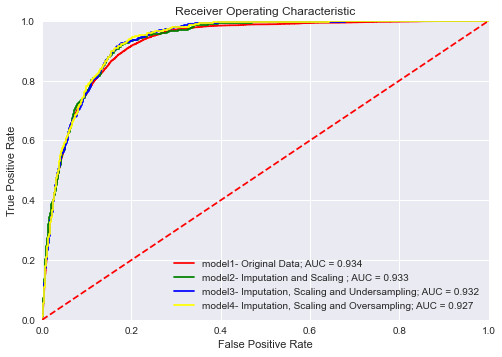

In [292]:

plt.style.use('seaborn')


plt.title('Receiver Operating Characteristic')
# plot roc curves
plt.plot(fpr1_testdata, tpr1_testdata, linestyle='-',color='red', label='model1- Original Data; AUC = %0.3f' % roc_auc4_testdata)
plt.plot(fpr2_testdata, tpr2_testdata, linestyle='-',color='green', label='model2- Imputation and Scaling ; AUC = %0.3f' % roc_auc3_testdata)
plt.plot(fpr3_testdata, tpr3_testdata, linestyle='-', color='blue',label='model3- Imputation, Scaling and Undersampling; AUC = %0.3f' % roc_auc2_testdata)
plt.plot(fpr4_testdata, tpr4_testdata, linestyle='-', color='yellow',label='model4- Imputation, Scaling and Oversampling; AUC = %0.3f' % roc_auc1_testdata)



plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

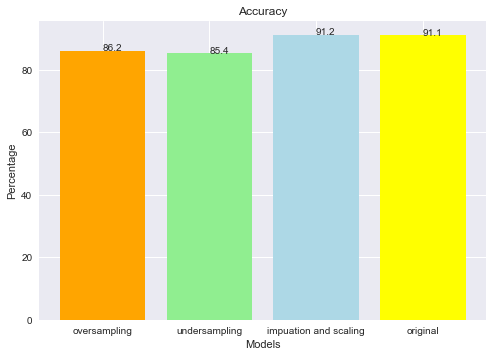

In [69]:

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':
    x = ['oversampling', 'undersampling','impuation and scaling' ,'original']
    y = [86.2,85.4,91.2,91.1]


    # making the bar chart on the data
    plt.bar(x, y,color=['orange','lightgreen', 'lightblue','yellow'])
      
    # calling the function to add value labels
    addlabels(x, y)
      
        
    plt.title("Accuracy")
    plt.xlabel("Models")
    plt.ylabel("Percentage")
      
    # visualizing the plot
    plt.show()



In [ ]:
#MODEL 4: Oversampling
Train accuracy: 0.8618578562145154 
Test accuracy : 0.8538480213644088 [for test dataset bank-additional]
AIC           : 39940.2350
Area Under the Receiver Operating Characteristic Curve for test dataset (bank-additional): 0.93373020574659


In [ ]:
#MODEL 3: Undersampling

Train accuracy: 0.8623383620689655 
Test accuracy : 0.8526341344986648 [for test dataset bank-additional]
AIC           : 5024.9777
Area Under the Receiver Operating Characteristic Curve:  0.9327043743819018

In [ ]:
#MODEL 2: Imputation and Scaling
Train accuracy: 0.9092564491654022 
Test accuracy : 0.9116290361738286   [for test dataset bank-additional]
AIC           :  14281.6822
Area Under the Receiver Operating Characteristic Curve: 0.9313844994885957

In [ ]:
#Model 1 : Original data

Area Under the Receiver Operating Characteristic Curve for test dataset (bank-additional): 0.9265333283957231
Train accuracy: 0.9098027314112291 
Test accuracy : 0.9105321938428669 [for test dataset bank-additional]

AIC:14358.5066 [with scaling]
AIC:14163.5039 [no scaling]   [for test dataset bank-additional]
Area Under the Receiver Operating Characteristic Curve: 0.9265333932608227